# **탐구활동. 구상성단을 활용하여 우리은하 질량 중심 위치 및 크기 추정하기**

# **1 데이터 수집 및 탐색**

## **1.1 데이터 수집**

### **1.1.1 패키지 라이브러리 불러오기**

In [1]:
! pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files # colab으로 파일 불러오기
import pandas as pd # 데이터 분석 패키지
import matplotlib.pyplot as plt # 그래프 패키지
from mpl_toolkits.mplot3d import Axes3D # 3차원 그래프 패키지
import numpy as np # 수치 분석 패키지

### **1.1.2 분석할 데이터 불러오기**

*   'globular_clusters_list.csv' 이라는 제목을 가진 csv 파일을 업로드 합니다.  

In [3]:
uploaded = files.upload()
df=pd.read_csv('globular_clusters_list.csv') # 구상성단 157개 csv파일 불러오기

Saving globular_clusters_list.csv to globular_clusters_list.csv


## **1.2 데이터 탐색**

### **1.2.1 전체 정보 확인하기**

*   분석하려는  Harris, W.E.의 구상성단 데이터의 전체적인 정보를 확인합니다.
*   행(rows) 157개, 열(columns) 11개를 가진 테이블 구조입니다. 

In [4]:
display(df) # 전체 데이터

,ID,Name,RA,DEC,L,B,R_Sun,R_gc,X,Y,Z
0,NGC 104,47 Tuc,00 24 05.67,-72 04 52.6,305.89,-44.89,4.5,7.4,1.9,-2.6,-3.1
1,NGC 288,NaN,00 52 45.24,-26 34 57.4,152.30,-89.38,8.9,12.0,-0.1,0.0,-8.9
2,NGC 362,NaN,01 03 14.26,-70 50 55.6,301.53,-46.25,8.6,9.4,3.1,-5.1,-6.2
3,Whiting 1,NaN,02 02 57,-03 15 10,161.22,-60.76,30.1,34.5,-13.9,4.7,-26.3
4,NGC 1261,NaN,03 12 16.21,-55 12 58.4,270.54,-52.12,16.3,18.1,0.1,-10.0,-12.9
...,...,...,...,...,...,...,...,...,...,...,...
152,NGC 7089,M 2,21 33 27.02,-00 49 23.7,53.37,-35.77,11.5,10.4,5.6,7.5,-6.7
153,NGC 7099,M 30,21 40 22.12,-23 10 47.5,27.18,-46.84,8.1,7.1,4.9,2.5,-5.9
154,Pal 12,NaN,21 46 38.84,-21 15 09.4,30.51,-47.68,19.0,15.8,11.0,6.5,-14.1
155,Pal 13,NaN,23 06 44.44,+12 46 19.2,87.10,-42.70,26.0,26.9,1.0,19.1,-17.6


### **1.2.2 요약 정보 확인하기**

*   분석하려는 구상성단 데이터의 요약 정보를 확인합니다.
*   각 열의 행 개수, 데이터 유형(type)을 확인합니다. (float64:실수형, object:문자형)

In [5]:
print(df.info()) # 요약 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      157 non-null    object 
 1   Name    51 non-null     object 
 2   RA      157 non-null    object 
 3   DEC     157 non-null    object 
 4   L       157 non-null    float64
 5   B       157 non-null    float64
 6   R_Sun   157 non-null    float64
 7   R_gc    157 non-null    float64
 8   X       157 non-null    float64
 9   Y       157 non-null    float64
 10  Z       157 non-null    float64
dtypes: float64(7), object(4)
memory usage: 13.6+ KB
None


### **1.2.3 기술 통계 확인하기**

*   분석하려는 구상성단 데이터의 기술 통계를 확인합니다.
*   각 열마다 데이터 개수(count), 평균(mean), 표준편차(std), 최소값(min), 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최고값(max)를 확인합니다.

In [6]:
print(df.describe()) # 기술 통계

                L           B       R_Sun        R_gc           X           Y  \
count  157.000000  157.000000  157.000000  157.000000  157.000000  157.000000   
mean   164.157834    1.567389   15.420382   12.384076    6.014013   -1.377707   
std    151.686059   27.119173   18.484681   19.846761   12.671993   11.298568   
min      0.070000  -89.380000    2.200000    0.500000  -74.700000  -80.100000   
25%      9.890000  -10.900000    7.100000    2.700000    3.600000   -2.600000   
50%     87.100000   -0.610000    9.400000    5.100000    7.000000    0.100000   
75%    332.960000   11.020000   15.600000   14.400000    9.800000    1.600000   
max    359.590000   79.760000  123.300000  124.600000   49.700000   34.800000   

                Z  
count  157.000000  
mean     1.148408  
std     15.906339  
min    -92.300000  
25%     -1.600000  
50%     -0.100000  
75%      1.700000  
max    103.200000  


# **2 데이터 처리**

## **2.1 데이터 정제**

### **2.1.1 분석하고자 하는 열만 추출한 후 데이터 정보 확인하기**


*   11개의 열 중 카테시안 좌표를 의미하는 X, Y, Z 열 3개만 분석에 사용하기 위해 추출합니다.

In [7]:
df_xyz = df[['X', 'Y', 'Z']] # X, Y, Z 열만 추출
display(df_xyz) # 정보 확인

,X,Y,Z
0,1.9,-2.6,-3.1
1,-0.1,0.0,-8.9
2,3.1,-5.1,-6.2
3,-13.9,4.7,-26.3
4,0.1,-10.0,-12.9
...,...,...,...
152,5.6,7.5,-6.7
153,4.9,2.5,-5.9
154,11.0,6.5,-14.1
155,1.0,19.1,-17.6


*    X, Y, Z의 요약 정보를 확인합니다.
*    X, Y, Z의 데이터가 모두 157개 임을 확인합니다.

In [8]:
print(df_xyz.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       157 non-null    float64
 1   Y       157 non-null    float64
 2   Z       157 non-null    float64
dtypes: float64(3)
memory usage: 3.8 KB
None


### **2.1.2 결측값 확인 및 결측값 처리하기** 

*  X, Y, Z의 결측값 개수가 모두 0개 임을 확인합니다.
*  처리할 결측값이 없음을 확인합니다.

In [9]:
print('X, Y, Z의 결측값 개수:', df_xyz.isnull().sum(), sep='\n') # X, Y, Z별 결측값 합계

X, Y, Z의 결측값 개수:
X    0
Y    0
Z    0
dtype: int64


## **2.2 데이터 변환**

### **2.2.1 X, Y, Z 열을 각각 독립적인 열로 추출하기**

*   df_xyz 변수에 하나로 묶인 X, Y, Z 열을 각각 독립적인 X 열, Y 열, Z 열로 추출합니다.

In [10]:
X = df_xyz['X'] # X 열만 추출 -> 변수 X에 저장
Y = df_xyz['Y'] # Y 열만 추출 -> 변수 Y에 저장
Z = df_xyz['Z'] # Z 열만 추출 -> 변수 Z에 저장

# **3a 데이터 분석 및 표현(원본 데이터를 사용할 때)**

## **3a.1 데이터 시각화**

### **3a.1.1 원본 x, y, z축 데이터(좌표)를 통해 구상성단 분포 시각화**

*   좌표평면 그림을 정의하는 함수를 만듭니다.
*   좌표평면에 카테시안 좌표 x, y, z를 변수로 한 구상 성단 분포를 여러가지 기호 스타일, 범례를 사용해 표현합니다.
*   그려질 총 좌표평면 그림이 4개 이므로 2행 2열로 그림을 배치합니다. 
*   1행 1열에는 x, y, z축의 3D 구상성단 분포를 배치합니다.
*   1행 2열에는 x, y축의 2D 구상성단 분포를 배치합니다.
*   2행 1열에는 x, z축의 2D 구상성단 분포를 배치합니다.
*   2행 2열에는 y, z축의 2D 구상성단 분포를 배치합니다. 

In [11]:
def visualization(x, y, z): # x축, y축, z축 데이터를 입력값으로 사용하는 그림 시각화 함수 생성
  fig = plt.figure(figsize=(15,15)) # 그림 크기 지정
  # 좌표평면 그림에 각 기호 스타일(색깔, 크기, 레이블) 지정
  # 3차원 그림 생성
  ax1 = fig.add_subplot(221, projection='3d') # 2행 2열 첫 번째 3D 그림 생성
  ax1.scatter(x,y,z, c='red', marker='o', s=15, alpha=0.5) # 분산형 분포 생성 및 스타일(색깔, 모양, 크기, 투명도) 지정 - 구상성단 위치
  ax1.set_xlabel('x(kpc)', fontsize=15, labelpad=10) # x축 제목 스타일(크기, 패드) 지정
  ax1.set_ylabel('y(kpc)', fontsize=15, labelpad=10) # y축 제목 스타일(크기, 패드) 지정
  ax1.set_zlabel('z(kpc)', fontsize=15, labelpad=10) # z축 제목 스타일(크기, 패드) 지정
  ax1.tick_params(labelsize=12, length=5, width=5) # 축 눈금 스타일(크기, 길이, 폭) 지정
  ax1.set_title('Globular Cluster Distribution in Milky Way', fontsize=20) # 제목 스타일(크기) 지정

  # X-Y 좌표평면 그림 생성
  ax2=fig.add_subplot(222) # 2행 2열 두 번째 2D 그림 생성
  ax2.plot(x,y,'+', ms='10', mec='red', mfc='red', label='Globular Cluster') # 좌표평면 기호 스타일(모양, 크기, 색깔) 지정 - 구상성단 위치
  ax2.plot(0,0,'o', ms='15', mec='blue', mfc='blue', label='Solar System') # 좌표 평면 기호 스타일(모양, 크기, 색깔) 지정 - 태양계 위치
  ax2.set_xlabel('x(kpc)', fontsize=15, labelpad=10) # x축 제목 스타일(크기, 패드) 지정
  ax2.set_ylabel('y(kpc)', fontsize=15, labelpad=10) # y축 제목 스타일(크기, 패드) 지정
  ax2.tick_params(labelsize=12, length=5, width=5) # 축 눈금 스타일(크기, 길이, 폭) 지정
  ax2.legend(loc='best', fontsize=12) # 범례 스타일(위치, 크기) 지정
  ax2.set_title('X-Y', fontsize=20) # 제목 스타일(크기) 지정
  ax2.grid(True) # 격자 생성

  # X-Z 좌표평면 그림 생성
  ax3=fig.add_subplot(223) # 2행 2열 세 번째 2D 그림 생성
  ax3.plot(x,z,'+', ms='10', mec='red', mfc='red', label='Globular Cluster') # 좌표평면 기호 스타일(모양, 크기, 색깔) 지정 - 구상성단 위치
  ax3.plot(0,0,'o', ms='15', mec='blue', mfc='blue', label='Solar System') # 좌표 평면 기호 스타일(모양, 크기, 색깔) 지정 - 태양계 위치  
  ax3.set_xlabel('x(kpc)', fontsize=15, labelpad=10) # x축 제목 스타일(크기, 패드) 지정
  ax3.set_ylabel('z(kpc)', fontsize=15, labelpad=10) # z축 제목 스타일(크기, 패드) 지정
  ax3.tick_params(labelsize=12, length=5, width=5) # 축 눈금 스타일(크기, 길이, 폭) 지정
  ax3.legend(loc='best', fontsize=12) # 범례 스타일(위치, 크기) 지정
  ax3.set_title('X-Z', fontsize=20) # 제목 스타일(크기) 지정
  ax3.grid(True) # 격자 생성

  # Y-Z 좌표평면 그림 생성
  ax4=fig.add_subplot(224) # 2행 2열 네 번째 2D 그림 생성
  ax4.plot(y,z,'+', ms='10', mec='red', mfc='red', label='Globular Cluster') # 좌표평면 기호 스타일(모양, 크기, 색깔) 지정 - 구상성단 위치
  ax4.plot(0,0,'o', ms='15', mec='blue', mfc='blue', label='Solar System') # 좌표평면 기호 스타일(모양, 크기, 색깔) 지정 - 태양계 위치
  ax4.set_xlabel('y(kpc)', fontsize=15, labelpad=10)  # y축 제목 스타일(크기, 패드) 지정
  ax4.set_ylabel('z(kpc)', fontsize=15, labelpad=10)  # z축 제목 스타일(크기, 패드) 지정
  ax4.tick_params(labelsize=12, length=5, width=5) # 축 눈금 스타일(크기, 길이, 폭) 지정
  ax4.legend(loc='best', fontsize=12) # 범례 스타일(위치, 크기) 지정
  ax4.set_title('Y-Z', fontsize=20) # 제목 스타일(크기) 지정 
  ax4.grid(True) # 격자 생성
  plt.show()

*   위에서 만든 visualization 함수에 원본 x, y, z축 데이터(좌표)가 담긴 X, Y, Z 변수를 입력하여 구상성단의 분포를 확인합니다.

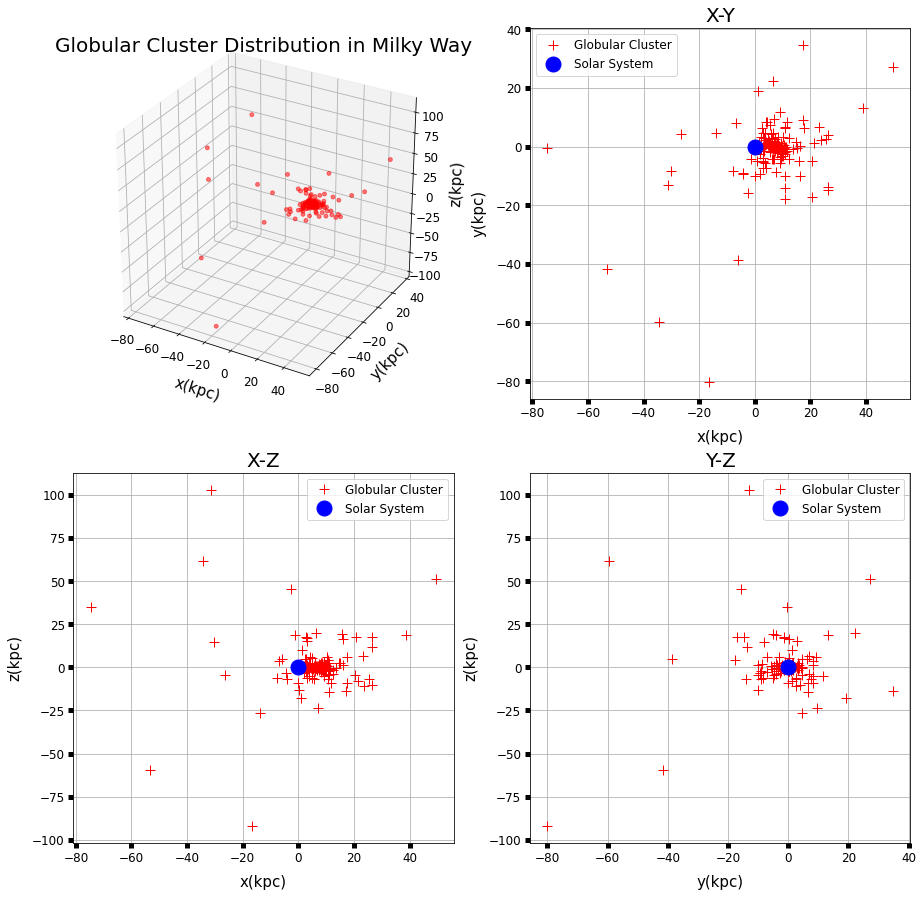

In [12]:
visualization(X, Y, Z)

## **3a.2 데이터 수치 분석**

### **3a.2.1 원본 x, y, z축 데이터(좌표)가 담긴 X, Y, Z 변수를 통해 우리은하 질량 중심 찾기 & 태양계로부터 우리은하 중심까지의 거리 구하기**

*   질량 중심 찾기 및 우리은하 중심까지의 거리를 계산하는 함수를 만듭니다.
*   x, y, z축 데이터(좌표)의 평균을 계산하여 질량 중심을 찾으며, 소수 둘째 자리까지만 표현합니다.
*   x, y, z축 데이터(좌표)의 평균으로부터 제곱근을 구해 우리은하 중심까지의 거리를 구하며, 소수 둘째 자리까지만 표현합니다.
*   x축 방향에서 구성성단 분포 데이터(좌표)의 최솟값과 최댓값을 구하며, 소수 둘째 자리까지만 표현합니다.
*   y축 방향에서 구성성단 분포 데이터(좌표)의 최솟값과 최댓값을 구하며, 소수 둘째 자리까지만 표현합니다.
*   z축 방향에서 구성성단 분포 데이터(좌표)의 최솟값과 최댓값을 구하며, 소수 둘째 자리까지만 표현합니다.

In [13]:
def calculation(x, y, z): # x축, y축, z축 데이터(좌표)를 입력값으로 사용하는 계산 함수 생성
  # x, y, z축 데이터(좌표)를 통해 우리은하 질량 중심 찾기
  m_x = x.mean() # x축 데이터(좌표) 평균
  m_y = y.mean() # y축 데이터(좌표) 평균
  m_z = z.mean() # z축 데이터(좌표) 평균
  print('x,y,z축 질량 중심(kpc):', format(m_x, '.2f'), format(m_y, '.2f'), format(m_z, '.2f')) # 각 축 질량 중심(소수 셋째 둘째 자리까지 표현)

  # x, y, z축 데이터(좌표)를 통해 태양계로부터 우리은하 중심까지의 거리 구하기
  m_xyz = [m_x, m_y, m_z] # 각 x, y, z축 평균값인 질량 중심 좌표값 모으기
  square_xyz = np.square(m_xyz) # 질량 중심 좌표값 제곱하기 
  sum_xyz = np.sum(square_xyz) # 제곱한 값 합하기
  sqrt_xyz = np.sqrt(sum_xyz) # 합한 제곱값을 제곱근으로 표현하여 거리 구하기
  print('우리은하 중심까지의 거리(kpc):', format(sqrt_xyz, '.2f')) # 벡터 거리(소수 셋째 둘째 자리까지 표현)

  # x, y, z축의 데이터(좌표)를 통해 구상성단 분포확인하기
  min_x = x.min() # x축 데이터(좌표) 최솟값
  max_x = x.max() # x축 데이터(좌표) 최댓값
  di_x = max_x - min_x # x축 데이터(좌표) 거리
  print('x축 방향에서 구상성단 분포 데이터(좌표)의 최솟값, 최댓값, 직경(kpc):', format(min_x, '.2f'), format(max_x, '.2f'), format(di_x, '.2f')) # 소수 셋째 둘째 자리까지 표현 

  min_y = y.min() # y축 데이터(좌표) 최솟값
  max_y = y.max() # y축 데이터(좌표) 최댓값
  di_y = max_y - min_y # y축 데이터(좌표) 거리 
  print('y축 방향에서 구상성단 분포 데이터(좌표)의 최솟값, 최댓값, 직경(kpc):', format(min_y, '.2f'), format(max_y, '.2f'), format(di_y, '.2f')) # 소수 셋째 둘째 자리까지 표현

  min_z = z.min() # z축 데이터(좌표) 최솟값
  max_z = z.max() # z축 데이터(좌표) 최댓값
  di_z = max_z - min_z # z축 데이터(좌표) 거리 
  print('z축 방향에서 구상성단 분포 데이터(좌표)의 최솟값, 최댓값, 직경(kpc):', format(min_z, '.2f'), format(max_z, '.2f'), format(di_z, '.2f')) # 소수 셋째 둘째 자리까지 표현

*   위에서 만든 calculation 함수에 원본 x, y, z 축 데이터(좌표)가 담긴 X, Y, Z 변수를 입력합니다.
*   우리은하 질량 중심 위치와 태양계로부터 우리은하 중심까지의 거리를 확인합니다.
*   구상성단은 대체로 구형 분포를 하기에, 구형 분포에서 벗어나 상당히 멀리 존재하는 구상성단을, 위 그림과 x, y, z축 좌표의 최솟값과 최댓값을 통해 확인합니다.

In [14]:
calculation(X, Y, Z)

x,y,z축 질량 중심(kpc): 6.01 -1.38 1.15
우리은하 중심까지의 거리(kpc): 6.28
x축 방향에서 구상성단 분포 데이터(좌표)의 최솟값, 최댓값, 직경(kpc): -74.70 49.70 124.40
y축 방향에서 구상성단 분포 데이터(좌표)의 최솟값, 최댓값, 직경(kpc): -80.10 34.80 114.90
z축 방향에서 구상성단 분포 데이터(좌표)의 최솟값, 최댓값, 직경(kpc): -92.30 103.20 195.50


# **3b 데이터 재분석 및 표현(데이터를 재처리한 것을 사용할 때)**

## **3b.0 데이터 재처리**

### **3b.0.1 데이터 재변환**

*   원본인 X, Y , Z 열의 데이터(좌표)를 내림차순((descending), 오름차순(ascending) 정렬합니다.

In [15]:
df_xyz['X_descen'] = df_xyz.sort_values(by='X', ascending=False)['X'].reset_index(drop=True) # 원본 X 열 내림차순 정렬
df_xyz['X_ascen'] = df_xyz.sort_values(by='X', ascending=True)['X'].reset_index(drop=True) # 원본 X 열 오름차순 정렬
df_xyz['Y_descen'] = df_xyz.sort_values(by='Y', ascending=False)['Y'].reset_index(drop=True) # 원본 Y 열 내림차순 정렬
df_xyz['Y_ascen'] = df_xyz.sort_values(by='Y', ascending=True)['Y'].reset_index(drop=True) # 원본 Y 열 오름차순 정렬
df_xyz['Z_descen'] = df_xyz.sort_values(by='Z', ascending=False)['Z'].reset_index(drop=True) # 원본 Z 열 내림차순 정렬
df_xyz['Z_ascen'] = df_xyz.sort_values(by='Z', ascending=True)['Z'].reset_index(drop=True) # 원본 Z 열 오름차순 정렬

display('각 열의 상위 20개 데이터(좌표):', df_xyz.head(20))

<ipython-input-15-01f16c2ecdb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xyz['X_descen'] = df_xyz.sort_values(by='X', ascending=False)['X'].reset_index(drop=True) # 원본 X 열 내림차순 정렬
<ipython-input-15-01f16c2ecdb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xyz['X_ascen'] = df_xyz.sort_values(by='X', ascending=True)['X'].reset_index(drop=True) # 원본 X 열 오름차순 정렬
<ipython-input-15-01f16c2ecdb6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

'각 열의 상위 20개 데이터(좌표):'

,X,Y,Z,X_descen,X_ascen,Y_descen,Y_ascen,Z_descen,Z_ascen
0,1.9,-2.6,-3.1,49.7,-74.7,34.8,-80.1,103.2,-92.3
1,-0.1,0.0,-8.9,38.9,-53.2,27.3,-59.7,61.7,-59.5
2,3.1,-5.1,-6.2,26.4,-34.3,22.3,-41.7,51.4,-26.3
3,-13.9,4.7,-26.3,26.4,-31.4,19.1,-38.7,45.6,-23.5
4,0.1,-10.0,-12.9,26.4,-30.2,13.3,-17.8,35.2,-17.6
5,-6.8,8.1,3.6,25.6,-26.4,11.7,-17.2,19.7,-14.1
6,-16.5,-80.1,-92.3,23.8,-16.5,9.4,-15.7,19.1,-13.7
7,-53.2,-41.7,-59.5,23.2,-13.9,9.3,-14.6,18.8,-12.9
8,-26.4,4.4,-4.3,21.4,-7.7,8.3,-14.0,18.6,-10.9
9,-4.2,-8.9,-6.9,20.7,-6.8,8.3,-13.7,17.8,-10.2


*   원본인 X, Y, Z 열의 데이터(좌표)에서 -30 ~ 30으로 한정된 구상성단만 추출합니다.
*   변환된 X, Y, Z 열의 구성성단 분포 데이터(좌표)의 최솟값, 최댓값을 확인합니다.

In [16]:
df_xyz1 = df_xyz[(df_xyz['X'] > -30) & (df_xyz['X'] < 30)] # X 열의 데이터(좌표)가 -30 ~ 30으로 한정된 구상성단만 추출
df_xyz2 = df_xyz1[(df_xyz1['Y'] > -30) & (df_xyz1['Y'] < 30)] # Y 열의 데이터(좌표)가 -30 ~ 30으로 한정된 구상성단만 추출
df_xyz3 = df_xyz2[(df_xyz2['Z'] > -30) & (df_xyz2['Z'] < 30)] # Z 열의 데이터(좌표)가 -30 ~ 30으로 한정된 구상성단만 추출
 
X1 = df_xyz3['X'] # 새롭게 변환된 X 열 -> 변수 X1에 저장
Y1 = df_xyz3['Y'] # 새롭게 변환된 Y 열 -> 변수 Y1에 저장
Z1 = df_xyz3['Z'] # 새롭게 변환된 Z 열 -> 변수 Z1에 저장

print('변환된 X 열(x축)에서 구상성단 분포 데이터(좌표)의 최솟값, 최댓값:', X1.min(), X1.max()) # 변환된 X 열(변수 X1)의 최솟값, 최댓값
print('변환된 Y 열(y축)에서 구상성단 분포 데이터(좌표)의 최솟값, 최댓값:', Y1.min(), Y1.max()) # 변환된 Y 열(변수 Y1)의 최솟값, 최댓값
print('변환된 Z 열(z축)에서 구상성단 분포 데이터(좌표)의 최솟값, 최댓값:', Z1.min(), Z1.max()) # 변환된 Z 열(변수 Z1)의 최솟값, 최댓값
print('변환된 X, Y, Z 열 구상성단 개수:', X1.size, Y1.size, Z1.size) # 변환된 X(변수 X1), Y(변수 Y1), Z(변수 Z1) 열의 구상성단 개수

변환된 X 열(x축)에서 구상성단 분포 데이터(좌표)의 최솟값, 최댓값: -26.4 26.4
변환된 Y 열(y축)에서 구상성단 분포 데이터(좌표)의 최솟값, 최댓값: -17.8 22.3
변환된 Z 열(z축)에서 구상성단 분포 데이터(좌표)의 최솟값, 최댓값: -26.3 19.7
변환된 X, Y, Z 열 구상성단 개수: 146 146 146


## **3b.1 데이터 시각화**

### **3b.1.1 변환된 x, y, z축 데이터(좌표)를 통해 구상성단 분포 시각화**

*   위에서 만든 visualization 함수에 변환된 x, y, z축 데이터(좌표)가 담긴 변수 X1, Y1, Z1을 입력하여 구상성단의 분포를 확인합니다.

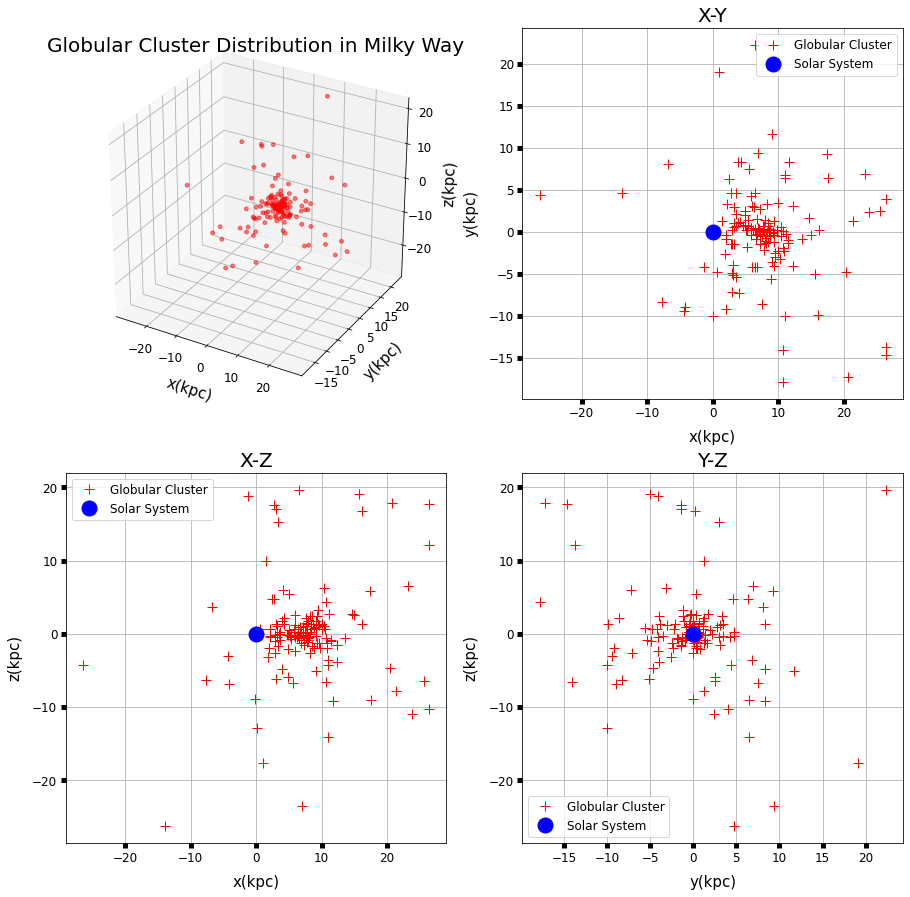

In [17]:
visualization(X1, Y1, Z1)

## **3b.2 데이터 수치 분석**

### **3b.2.1 변환된 x, y, z축 데이터(좌표)를 통해 우리은하 질량 중심 찾기 & 태양계로부터 우리은하 중심까지의 거리 구하기**

*   위에서 만든 calculation 함수에 변환된 x, y, z축 데이터(좌표)가 담긴 변수 X1, Y1, Z1을 입력하여 우리은하 질량 중심 위치와 태양계로부터 우리은하 중심까지의 거리를 확인합니다.

In [18]:
calculation(X1, Y1, Z1)

x,y,z축 질량 중심(kpc): 7.45 -0.23 0.07
우리은하 중심까지의 거리(kpc): 7.45
x축 방향에서 구상성단 분포 데이터(좌표)의 최솟값, 최댓값, 직경(kpc): -26.40 26.40 52.80
y축 방향에서 구상성단 분포 데이터(좌표)의 최솟값, 최댓값, 직경(kpc): -17.80 22.30 40.10
z축 방향에서 구상성단 분포 데이터(좌표)의 최솟값, 최댓값, 직경(kpc): -26.30 19.70 46.00
